# Figure 7

**Figure 7.**  Cross-sections of (a) shortwave, (b) longwave, and (c) net CRH calculated with the ice-optical parameterization of Fu in the WCB ascent region. Panels (d-f) show CRH differences between the ice schemes of Fu and the ice scheme of Baum with the general habit mixture (Fu - Baum). Cross-sections are shown at domain local hour 14:30 and at 3◦ longitude.

---
@ Behrooz Keshtgar, KIT 2024

## 1- load python packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import colorlegend
import warnings
warnings.filterwarnings("ignore")

For reference, print package versions to screen:

In [2]:
print('xarrary:   ', xr.__version__)
print('numpy:     ', np.__version__)
import matplotlib; print('matplotlib:', matplotlib.__version__); del matplotlib

xarrary:    0.16.0
numpy:      1.23.5
matplotlib: 3.3.0


## 2- Loading datasets

In [9]:
ds_twostr_fu = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/WCB_ascent/libradtran_pp_twostr_Fu.nc')
ds_twostr_baum = xr.open_dataset('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/WCB_ascent/libradtran_pp_twostr_Baum_ghm.nc')

ds_twostr_fu['lat'] = np.linspace(41,47,1686)
ds_twostr_baum['lat'] = np.linspace(41,47,1686)

ds_twostr_fu = ds_twostr_fu.isel(time=4,lon=1050)
ds_twostr_baum = ds_twostr_baum.isel(time=4,lon=1050)

### For data publication

In [15]:
# creating a dataset and save for data publication
ds_out = xr.Dataset(
    data_vars={
        "swcrh_fu_dom02"     : (ds_twostr_fu['swcrh'].dims, ds_twostr_fu['swcrh'].data),
        "lwcrh_fu_dom02"     : (ds_twostr_fu['lwcrh'].dims, ds_twostr_fu['lwcrh'].data),
        "swcrh_baum_dom02"     : (ds_twostr_baum['swcrh'].dims, ds_twostr_baum['swcrh'].data),
        "lwcrh_baum_dom02"     : (ds_twostr_baum['lwcrh'].dims, ds_twostr_baum['lwcrh'].data),
        
    },
    coords=ds_twostr_fu['swcrh'].coords)
ds_out = ds_out.assign(z_mc=ds_twostr_fu['z_mc'])

ds_out.attrs['description'] = ' Cross-sections of CRH at hour 14:30 and lon 3° with ice optics of Fu and Baum_ghm in the WCB ascent region'
ds_out.to_netcdf('/work/bb1135/b381185/icon_output/data_for_crh_unc_paper/postprocessed_data_for_publication/for_publication/figure7.nc')

## 4- Plot

Text(0.514, 0.92, 'Fu scheme')

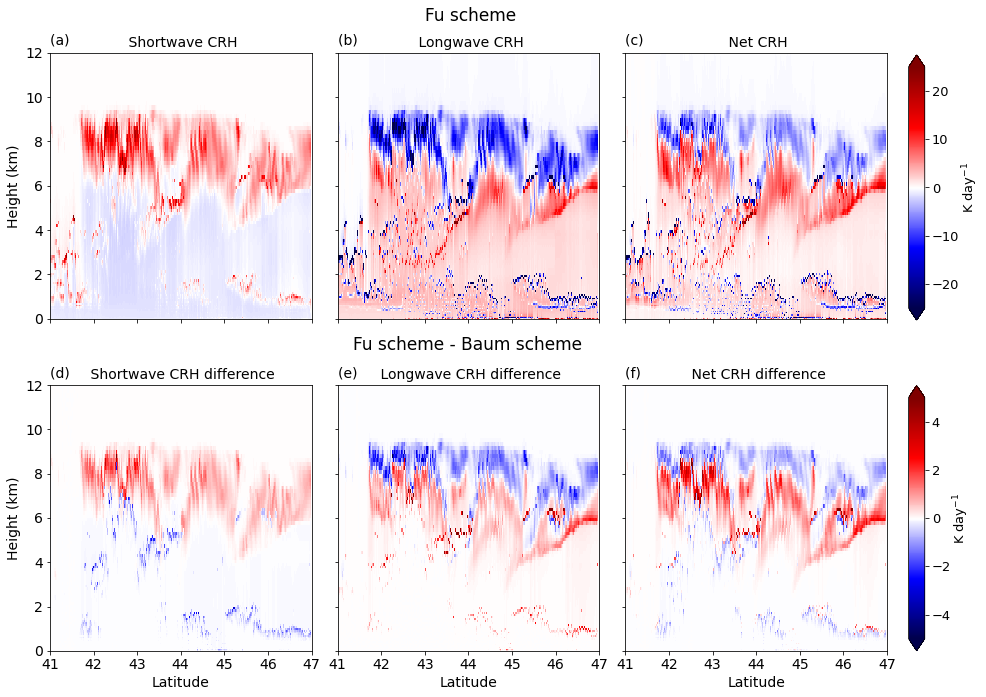

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 11))
i = 0

z = ds_twostr_fu['z_mc']
lat = ds_out['lat']
#lon = np.linspace(-1,5,2064)

for ax in axes.flat:
    ax.tick_params(labelsize=14)
    ax.set_ylim([0,12])
    
    if i == 0:
        swcrh = ds_out['swcrh_fu_dom02']
        im0 = ax.pcolor(lat,z,swcrh.transpose(),cmap='seismic',vmin=-25,vmax=25)
        ax.set_title(' Shortwave CRH', fontsize=14)
        ax.set_xticklabels([])
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.text(0.0, 1.03, '(a) ', transform=ax.transAxes, 
            size=14)
        
    if i == 1:
        lwcrh = ds_out['lwcrh_fu_dom02']
        im0 = ax.pcolor(lat,z,lwcrh.transpose(),cmap='seismic',vmin=-25,vmax=25)
        ax.set_title(' Longwave CRH', fontsize=14)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(b) ', transform=ax.transAxes, 
            size=14)
        
        
    if i == 2:
        ntcrh = ds_out['swcrh_fu_dom02'] + ds_out['lwcrh_fu_dom02']
        im0 = ax.pcolor(lat,z,ntcrh.transpose(),cmap='seismic',vmin=-25,vmax=25)
        ax.set_title(' Net CRH', fontsize=14)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(c) ', transform=ax.transAxes, 
            size=14)
        
    ####################
    
    if i == 3:
        diffswcrh = ds_out['swcrh_fu_dom02'] - ds_out['swcrh_baum_dom02']
        im1 = ax.pcolor(lat,z,diffswcrh.transpose(),cmap='seismic',vmin=-5,vmax=5)
        ax.set_xlabel('Latitude', fontsize=14)
        ax.set_title(' Shortwave CRH difference', fontsize=14)
        ax.set_ylabel('Height (km)', fontsize=14)
        ax.text(0.0, 1.03, '(d) ', transform=ax.transAxes, 
            size=14)
        
    if i == 4:
        difflwcrh = ds_out['lwcrh_fu_dom02'] - ds_out['lwcrh_baum_dom02']
        im1 = ax.pcolor(lat,z,difflwcrh.transpose(),cmap='seismic',vmin=-5,vmax=5)
        ax.set_xlabel('Latitude', fontsize=14)
        ax.set_title(' Longwave CRH difference', fontsize=14)
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(e) ', transform=ax.transAxes, 
            size=14)
        
        
    if i == 5:
        ntcrh_fu   = ds_out['swcrh_fu_dom02'] + ds_out['lwcrh_fu_dom02']
        ntcrh_baum = ds_out['swcrh_baum_dom02'] + ds_out['lwcrh_baum_dom02']
        diffnt = ntcrh_fu - ntcrh_baum
        im1 = ax.pcolor(lat,z,diffnt.transpose(),cmap='seismic',vmin=-5,vmax=5)
        ax.set_xlabel('Latitude', fontsize=14)
        ax.set_title(' Net CRH difference', fontsize=14)
        ax.set_yticklabels([])
        ax.text(0.0, 1.03, '(f) ', transform=ax.transAxes, 
            size=14)
        
    i = i + 1
    
fig.subplots_adjust(wspace=0.1,hspace=0.25) 

cb_ax = fig.add_axes([0.92, 0.5425, 0.015, 0.335]) # xcenter/ycenter/width/height
cbar = fig.colorbar(im0,cax=cb_ax,orientation='vertical',shrink=0.95,extend='both')
cbar.set_label(label='K day$^{-1}$', size='13',labelpad=1)
cbar.ax.tick_params(labelsize=13)

cb_ax = fig.add_axes([0.92, 0.125, 0.015, 0.335]) # xcenter/ycenter/width/height
cbar = fig.colorbar(im1,cax=cb_ax,orientation='vertical',shrink=0.95,extend='both')
cbar.set_label(label='K day$^{-1}$', size='13',labelpad=1)
cbar.ax.tick_params(labelsize=13)

plt.text(.512, 0.505, 'Fu scheme - Baum scheme', transform=fig.transFigure, horizontalalignment='center',fontsize=17)
plt.text(.514, 0.92, 'Fu scheme', transform=fig.transFigure, horizontalalignment='center',fontsize=17)

#plt.savefig('figure7.png', bbox_inches = 'tight',dpi=300)
#plt.savefig('figure7.pdf', format='pdf', bbox_inches='tight', dpi=300, compression=6)